# Household Vehicle Ownership – Hudson County

[Hudson County] contains several of [the densest cities in the US](https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population_density). In the US, New York and Hudson Counties are the only counties where a majority of residents commute using public transit.

Below are some stats about household car ownership in Hudson County.

[Hudson County]: https://en.wikipedia.org/wiki/Hudson_County,_New_Jersey

In [1]:
from utz import *
from hhvs.plot_utils import *
from hhvs import plot_utils
ire.chdir('../hudson')

In [2]:
year = 2023
subtitle = f'Hudson County municipalities, ACS 5yr {year}'
plot_kwargs = dict(subtitle=subtitle)
abs_plot = partial(plot_utils.abs_plot, **plot_kwargs)
pct_plot = partial(plot_utils.pct_plot, **plot_kwargs)

In [3]:
[csv_path] = glob.glob(f'data/{year}/ACS*5Y{year}*.csv')
csv_path

'data/2023/ACSDT5Y2023.B08201-2025-06-21T160435.csv'

In [4]:
d = read_csv(csv_path)
d

,Label (Grouping),"Bayonne city, Hudson County, New Jersey!!Estimate","Bayonne city, Hudson County, New Jersey!!Margin of Error","East Newark borough, Hudson County, New Jersey!!Estimate","East Newark borough, Hudson County, New Jersey!!Margin of Error","Guttenberg town, Hudson County, New Jersey!!Estimate","Guttenberg town, Hudson County, New Jersey!!Margin of Error","Harrison town, Hudson County, New Jersey!!Estimate","Harrison town, Hudson County, New Jersey!!Margin of Error","Hoboken city, Hudson County, New Jersey!!Estimate","Hoboken city, Hudson County, New Jersey!!Margin of Error","Jersey City city, Hudson County, New Jersey!!Estimate","Jersey City city, Hudson County, New Jersey!!Margin of Error","Kearny town, Hudson County, New Jersey!!Estimate","Kearny town, Hudson County, New Jersey!!Margin of Error","North Bergen township, Hudson County, New Jersey!!Estimate","North Bergen township, Hudson County, New Jersey!!Margin of Error","Secaucus town, Hudson County, New Jersey!!Estimate","Secaucus town, Hudson County, New Jersey!!Margin of Error","Union City city, Hudson County, New Jersey!!Estimate","Union City city, Hudson County, New Jersey!!Margin of Error","Weehawken township, Hudson County, New Jersey!!Estimate","Weehawken township, Hudson County, New Jersey!!Margin of Error","West New York town, Hudson County, New Jersey!!Estimate","West New York town, Hudson County, New Jersey!!Margin of Error"
0,Total:,"28,325",±769,829,±102,"4,953",±484,"8,991",±402,"27,654",±588,"123,132","±1,461","14,756",±463,"23,784",±884,"8,525",±491,"25,782",±770,"8,176",±408,"20,645",±673
1,No vehicle available,"6,622",±662,207,±69,"1,724",±437,"2,956",±439,"9,296",±644,"48,193","±1,611","2,227",±394,"5,460",±675,898,±313,"10,430",±893,"1,712",±333,"8,499",±701
2,1 vehicle available,"12,924",±827,332,±116,"2,094",±353,"4,270",±545,"15,552",±832,"53,495","±1,924","5,922",±549,"11,638","±1,061","3,839",±470,"11,408",±746,"4,643",±536,"9,050",±737
3,2 vehicles available,"6,163",±559,243,±81,"1,046",±273,"1,563",±302,"2,381",±452,"17,244","±1,050","4,560",±539,"4,889",±626,"2,982",±426,"2,993",±454,"1,516",±325,"2,393",±450
4,3 vehicles available,"1,904",±371,47,±44,71,±58,157,±90,391,±164,"3,362",±570,"1,354",±279,"1,146",±252,521,±199,833,±228,259,±119,569,±205
5,4 or more vehicles available,712,±243,0,±14,18,±31,45,±48,34,±38,838,±203,693,±202,651,±223,285,±140,118,±76,46,±42,134,±88
6,1-person household:,"9,269",±796,81,±49,"1,670",±413,"3,173",±568,"8,931",±743,"40,574","±1,732","3,279",±517,"6,983",±851,"2,153",±391,"6,849",±663,"2,737",±502,"5,994",±709
7,No vehicle available,"3,782",±498,24,±23,844,±267,"1,227",±324,"4,834",±541,"23,841","±1,184",983,±266,"2,833",±455,700,±280,"4,193",±538,851,±215,"3,181",±564
8,1 vehicle available,"5,010",±597,50,±43,799,±222,"1,910",±459,"4,090",±536,"16,197","±1,292","1,901",±341,"4,047",±670,"1,367",±302,"2,582",±399,"1,856",±452,"2,621",±476
9,2 vehicles available,364,±141,0,±14,27,±34,36,±49,7,±11,445,±180,360,±195,94,±64,69,±48,49,±50,30,±34,162,±104


In [5]:
[ lbl, *cols ] = d.columns.tolist()

COL_RGX = re.compile(r'(?P<muni>.*) (?:city|borough|town|township), Hudson County, New Jersey!!(?P<type>Estimate|Margin of Error)')
def parse_col(col):
    m = COL_RGX.fullmatch(col)
    return (m['muni'], m['type'])

lbl = ('Label', '')
cols = [
    parse_col(col)
    for col in cols
]
munis = set([ m for m, _ in cols ])
cols

[('Bayonne', 'Estimate'),
 ('Bayonne', 'Margin of Error'),
 ('East Newark', 'Estimate'),
 ('East Newark', 'Margin of Error'),
 ('Guttenberg', 'Estimate'),
 ('Guttenberg', 'Margin of Error'),
 ('Harrison', 'Estimate'),
 ('Harrison', 'Margin of Error'),
 ('Hoboken', 'Estimate'),
 ('Hoboken', 'Margin of Error'),
 ('Jersey City', 'Estimate'),
 ('Jersey City', 'Margin of Error'),
 ('Kearny', 'Estimate'),
 ('Kearny', 'Margin of Error'),
 ('North Bergen', 'Estimate'),
 ('North Bergen', 'Margin of Error'),
 ('Secaucus', 'Estimate'),
 ('Secaucus', 'Margin of Error'),
 ('Union City', 'Estimate'),
 ('Union City', 'Margin of Error'),
 ('Weehawken', 'Estimate'),
 ('Weehawken', 'Margin of Error'),
 ('West New York', 'Estimate'),
 ('West New York', 'Margin of Error')]

In [6]:
munis

{'Bayonne',
 'East Newark',
 'Guttenberg',
 'Harrison',
 'Hoboken',
 'Jersey City',
 'Kearny',
 'North Bergen',
 'Secaucus',
 'Union City',
 'Weehawken',
 'West New York'}

In [7]:
dc = d.copy()
dc.columns = pd.MultiIndex.from_tuples([lbl] + cols)
dc = dc.iloc[:6].set_index('Label')
dc

Bayonne                 East Newark  \
                                 Estimate Margin of Error    Estimate   
Label                                                                   
Total:                             28,325            ±769         829   
    No vehicle available            6,622            ±662         207   
    1 vehicle available            12,924            ±827         332   
    2 vehicles available            6,163            ±559         243   
    3 vehicles available            1,904            ±371          47   
    4 or more vehicles available      712            ±243           0   

                                                 Guttenberg                  \
                                 Margin of Error   Estimate Margin of Error   
Label                                                                         
Total:                                      ±102      4,953            ±484   
    No vehicle available                     ±69      1,724            ±437   
    1 vehicle available                     ±116      2,094            ±353   
    2 vehicles available                     ±81      1,046            ±273   
    3 vehicles available                     ±44         71             ±58   
    4 or more vehicles available             ±14         18             ±31   

                                 Harrison                  Hoboken  \
                                 Estimate Margin of Error Estimate   
Label                                                                
Total:                              8,991            ±402   27,654   
    No vehicle available            2,956            ±439    9,296   
    1 vehicle available             4,270            ±545   15,552   
    2 vehicles available            1,563            ±302    2,381   
    3 vehicles available              157             ±90      391   
    4 or more vehicles available       45             ±48       34   

                                                 Jersey City                  \
                                 Margin of Error    Estimate Margin of Error   
Label                                                                          
Total:                                      ±588     123,132          ±1,461   
    No vehicle available                    ±644      48,193          ±1,611   
    1 vehicle available                     ±832      53,495          ±1,924   
    2 vehicles available                    ±452      17,244          ±1,050   
    3 vehicles available                    ±164       3,362            ±570   
    4 or more vehicles available             ±38         838            ±203   

                                   Kearny                 North Bergen  \
                                 Estimate Margin of Error     Estimate   
Label                                                                    
Total:                             14,756            ±463       23,784   
    No vehicle available            2,227            ±394        5,460   
    1 vehicle available             5,922            ±549       11,638   
    2 vehicles available            4,560            ±539        4,889   
    3 vehicles available            1,354            ±279        1,146   
    4 or more vehicles available      693            ±202          651   

                                                 Secaucus                  \
                                 Margin of Error Estimate Margin of Error   
Label                                                                       
Total:                                      ±884    8,525            ±491   
    No vehicle available                    ±675      898            ±313   
    1 vehicle available                   ±1,061    3,839            ±470   
    2 vehicles available                    ±626    2,982            ±426   
    3 vehicles available                    ±252      521            ±199   
    4 or more vehicles availa

In [8]:
de = dc[[(m, 'Estimate') for m in munis]]
de.columns = [ m for m, e in de.columns ]
rows_map = {
    'Total:': "Total households",
    'No vehicle available': '0 vehicles',
    '1 vehicle available': '1 vehicle',
    '2 vehicles available': '2 vehicles',
    '3 vehicles available': '3 vehicles',
    '4 or more vehicles available': '4+ vehicles',
}
rows = [ r.strip() for r in de.index ]

assert rows == list(rows_map.keys())
de.index = list(rows_map.values())
de.columns.name = 'Municipality'
de = de.transpose().map(lambda s: s.replace(',', '') if isinstance(s, str) else s).astype(int)
de

,Total households,0 vehicles,1 vehicle,2 vehicles,3 vehicles,4+ vehicles
Municipality,,,,,,
Weehawken,8176,1712,4643,1516,259,46
Union City,25782,10430,11408,2993,833,118
Guttenberg,4953,1724,2094,1046,71,18
North Bergen,23784,5460,11638,4889,1146,651
Bayonne,28325,6622,12924,6163,1904,712
Kearny,14756,2227,5922,4560,1354,693
East Newark,829,207,332,243,47,0
Harrison,8991,2956,4270,1563,157,45
Jersey City,123132,48193,53495,17244,3362,838


In [9]:
de.dtypes

Total households    int64
0 vehicles          int64
1 vehicle           int64
2 vehicles          int64
3 vehicles          int64
4+ vehicles         int64
dtype: object

In [10]:
tc = 'Total households'
hhs_totals = de[tc]
hhs = de.drop(columns=tc).sum(1)
assert (hhs == hhs_totals).all()

## Households x Vehicles x Municipality

Source: [data.census.gov].

[data.census.gov]: https://data.census.gov/table/ACSDT5Y2023.B08201?t=Transportation&g=060XX00US3401703580,3401719360,3401728650,3401730210,3401732250,3401736000,3401736510,3401752470,3401766570,3401774630,3401777930,3401779610&y=2023

### Households

In [11]:
hhst = de.sort_values(tc, ascending=False)
hhs = hhst.drop(columns=tc)
hhs.columns = hhs.columns.copy()
hhs.columns.name = 'Household vehicles'
export(hhst, 'hh', per_page=20)

Saved parquet to ../hudson/.ire/hh.parquet


,Total households,0 vehicles,1 vehicle,2 vehicles,3 vehicles,4+ vehicles
Municipality,,,,,,
Jersey City,123132,48193,53495,17244,3362,838
Bayonne,28325,6622,12924,6163,1904,712
Hoboken,27654,9296,15552,2381,391,34
Union City,25782,10430,11408,2993,833,118
North Bergen,23784,5460,11638,4889,1146,651
West New York,20645,8499,9050,2393,569,134
Kearny,14756,2227,5922,4560,1354,693
Harrison,8991,2956,4270,1563,157,45
Secaucus,8525,898,3839,2982,521,285


In [12]:
hhs_totals.sum()

295552

### Percentages

In [13]:
hhs_pcts = hhs.div(hhs_totals, axis=0).sort_values('0 vehicles', ascending=False)
hhsp_exp = hhs_pcts.copy()
hhs_pcts.columns = ['0', '1', '2', '3', '4+']
hhs_pcts.columns.name = 'Household vehicles'
export(hhsp_exp, 'hh_pct', per_page=20, fmts={ float: '.1%' })

Saved parquet to ../hudson/.ire/hh_pct.parquet


Household vehicles,0 vehicles,1 vehicle,2 vehicles,3 vehicles,4+ vehicles
Municipality,,,,,
West New York,0.411674,0.438363,0.115912,0.027561,0.006491
Union City,0.404546,0.442479,0.116089,0.032309,0.004577
Jersey City,0.391393,0.434452,0.140045,0.027304,0.006806
Guttenberg,0.348072,0.422774,0.211185,0.014335,0.003634
Hoboken,0.336154,0.562378,0.086100,0.014139,0.001229
Harrison,0.328773,0.474919,0.173841,0.017462,0.005005
East Newark,0.249698,0.400483,0.293124,0.056695,0.000000
Bayonne,0.233786,0.456275,0.217582,0.067220,0.025137
North Bergen,0.229566,0.489321,0.205558,0.048184,0.027371


## 

### Households

Saved plotly to ../hudson/.ire/households_by_vehicle_count.json


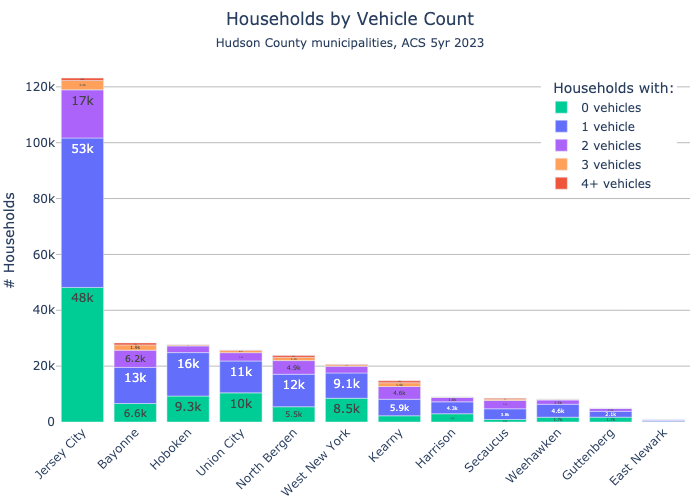

In [14]:
abs_plot(
    hhs,
    melt='# Households',
    title='Households by Vehicle Count',
    legend=ur_legend('  Households with:'),
    name='households_by_vehicle_count',
)

### Percentages

Saved plotly to ../hudson/.ire/households_by_vehicle_count_pcts.json


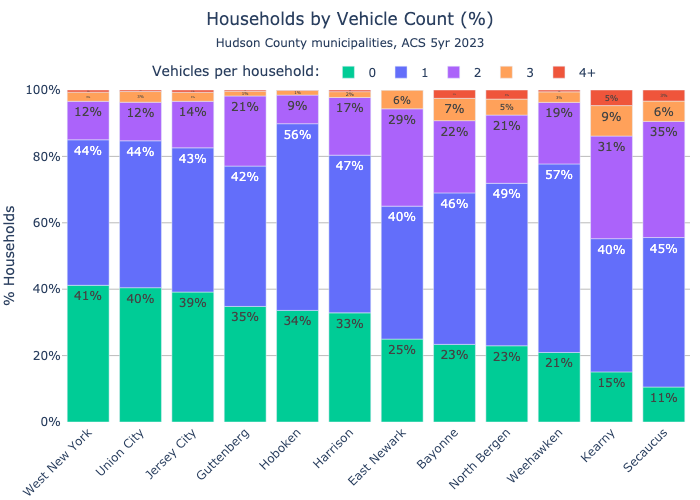

In [15]:
pct_plot(
    hhs_pcts,
    melt='% Households',
    title='Households by Vehicle Count (%)',
    name='households_by_vehicle_count_pcts',
)

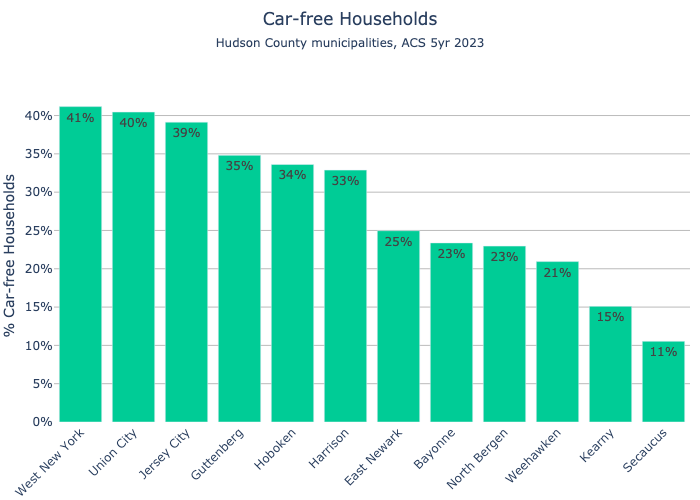

In [16]:
plot(
    hhs_pcts[['0']],
    melt='% Car-free Households',
    title='Car-free Households',
    subtitle=subtitle,
    pct=True,
    yrange=None,
    layout=dict(**pct_layout, showlegend=False),
    name='car_free_households',
    export=False,
)

In [17]:
columns = {
    '1 vehicle': '1-vehicle households',
    '2 vehicles': '2-vehicle households',
    '3 vehicles': '3-vehicle households',
    '4+ vehicles': '4+-vehicle households',
}
vhs = hhs.copy().rename(columns=columns)[columns.values()]
for i in range(1, 5):
    s = '4+' if i == 4 else f'{i}'
    col = f'{s}-vehicle households'
    vhs[col] *= i
vhs_totals = vhs.sum(1).rename('Total vehicles')
vhst = sxs(vhs, vhs_totals).sort_values('Total vehicles', ascending=False)
vhs = vhst.drop(columns='Total vehicles')
vhs.columns = vhs.columns.copy()
vhs.columns.name = 'Household vehicles'
vhs

Household vehicles,1-vehicle households,2-vehicle households,3-vehicle households,4+-vehicle households
Municipality,,,,
Jersey City,53495,34488,10086,3352
Bayonne,12924,12326,5712,2848
North Bergen,11638,9778,3438,2604
Kearny,5922,9120,4062,2772
Hoboken,15552,4762,1173,136
Union City,11408,5986,2499,472
West New York,9050,4786,1707,536
Secaucus,3839,5964,1563,1140
Weehawken,4643,3032,777,184


## 

### Households

Saved plotly to ../hudson/.ire/vehicles_by_household_count.json


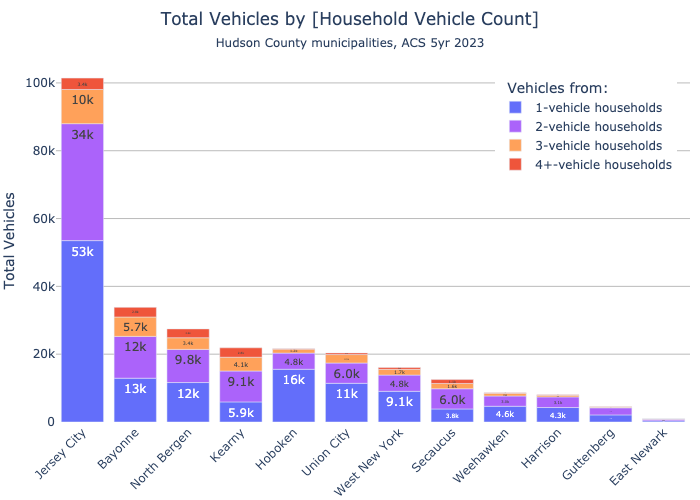

In [18]:
abs_plot(
    vhs,
    melt='Total Vehicles',
    title='Total Vehicles by [Household Vehicle Count]',
    colors=default_colors[1:],
    legend=ur_legend('  Vehicles from:'),
    name='vehicles_by_household_count',
)

In [19]:
vhs_pcts = vhs.div(vhs_totals, axis=0).sort_values('1-vehicle households', ascending=False)
vhs_pcts.columns = ['1', '2', '3', '4+']
vhs_pcts.columns.name = '# vehicles'
vhs_pcts

# vehicles,1,2,3,4+
Municipality,,,,
Hoboken,0.719234,0.220228,0.054248,0.006290
West New York,0.562846,0.297655,0.106163,0.033335
Union City,0.560177,0.293936,0.122711,0.023177
Weehawken,0.537633,0.351088,0.089972,0.021306
Harrison,0.530633,0.388468,0.058531,0.022369
Jersey City,0.527455,0.340048,0.099447,0.033050
Guttenberg,0.468352,0.467904,0.047640,0.016104
North Bergen,0.423847,0.356108,0.125209,0.094836
Bayonne,0.382254,0.364567,0.168944,0.084235


### Percentages

Saved plotly to ../hudson/.ire/vehicles_by_household_count_pcts.json


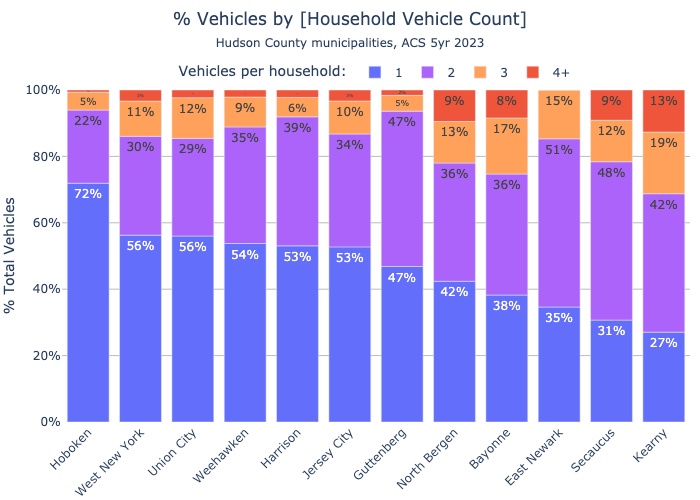

In [20]:
pct_plot(
    vhs_pcts,
    melt='% Total Vehicles',
    title='% Vehicles by [Household Vehicle Count]',
    colors=colors[1:],
    name='vehicles_by_household_count_pcts',
)